<a href="https://colab.research.google.com/github/skappal7/Coursera-Data-science-Project/blob/master/Customer_Churn_Naive_Bayes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://skappal7.files.wordpress.com/2017/08/datadojo7.jpg?w=150)

**Customer Churn Model Using Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
training = pd.read_csv('Training Data_C.csv')
test = pd.read_csv('Test Data_C.csv')

In [0]:
xtrain = training.drop('Outcome', axis=1)
ytrain = training.loc[:, 'Outcome']
xtest = test.drop('Outcome', axis=1)
ytest = test.loc[:, 'Outcome']

In [0]:
model = GaussianNB()

In [11]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred = model.predict(xtest)

Text(89.18, 0.5, 'Predicted')

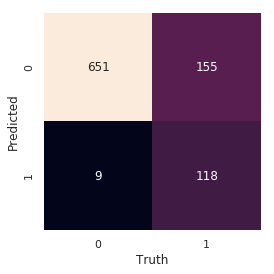

In [13]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [0]:
import sklearn.metrics as metrics

In [0]:
probs = model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

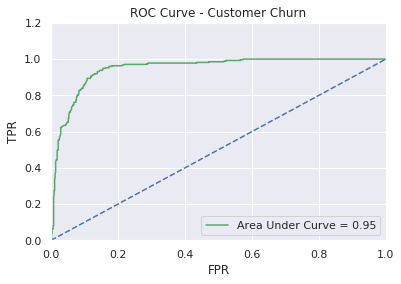

In [35]:
plt.title('ROC Curve - Customer Churn')
plt.plot(fpr, tpr, 'g', label = 'Area Under Curve = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()